In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 1000)
%matplotlib inline

In [14]:
files = {
    'AverageKDTree': 'average_kd_tree',
    'MedianKDTree': 'median_kd_tree',
    'CrackingKDTree': 'cracking_kd_tree',
    'CrackingKDTreePerDimension': 'cracking_kd_tree_pd',
    'Quasii': 'quasii',
    'FullScan':'full_scan',
    'FullScanCandidate': 'full_scan_cl',
    'ProgressiveIndex': 'progressive_index-0-2'
}
def read_df(path):
    df = pd.read_csv('results/2cols-' + path + '-1024.csv')
    repetitions = df['repetition'].max() + 1
    step = int(len(df.index)/repetitions)
    df_final = df[:step].copy().reset_index()
    for rep in range(1, repetitions):
        df_final += df[step * (rep) : step * (rep + 1)].copy().reset_index()
    return df_final/repetitions

# Cumulative Response Time

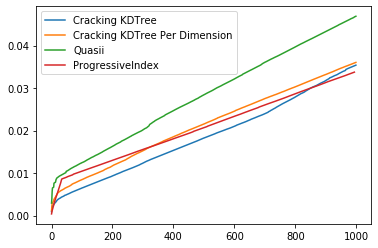

In [17]:
def plot_time(df, name):
    plt.plot((df['initialization_time'] + df['index_search_time'] + df['scan_time'] + df['adaptation_time']).cumsum(), label=name)
# plot_time(read_df(files['AverageKDTree']), 'Average KDTree')
# plot_time(read_df(files['MedianKDTree']), 'Median KDTree')
plot_time(read_df(files['CrackingKDTree']), 'Cracking KDTree')
plot_time(read_df(files['CrackingKDTreePerDimension']), 'Cracking KDTree Per Dimension')
plot_time(read_df(files['Quasii']), 'Quasii')
plot_time(read_df(files['ProgressiveIndex']), 'ProgressiveIndex')
# plt.plot(pd.read_csv(files['FullScan'] + cols)['scan_time'].cumsum(), label='Full Scan')
# plt.plot(pd.read_csv(files['FullScanCandidate'] + cols)['scan_time'].cumsum(), label='Full Scan Candidate List')
plt.legend()

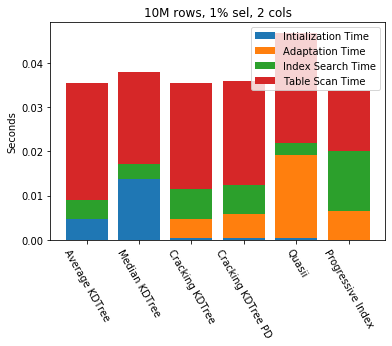

In [19]:
def stack_bar(dfs, names):
    ind = list(range(len(dfs)))
    
    for df in dfs:
        if 'index_search_time' not in df:
            df['index_search_time'] = 0
    
    initializations = np.array([x['initialization_time'].sum() for x in dfs])
    adaptation = np.array([x['adaptation_time'].sum() for x in dfs])
    search = np.array([x['index_search_time'].sum() for x in dfs])
    scan = np.array([x['scan_time'].sum() for x in dfs])
    
    plt.bar(ind, initializations, label='Intialization Time')
    plt.bar(ind, adaptation, bottom=initializations, label='Adaptation Time')
    plt.bar(ind, search, bottom=initializations + adaptation, label='Index Search Time')
    plt.bar(ind, scan, bottom=initializations + adaptation + search, label='Table Scan Time')
    plt.xticks(ind, names, rotation=300)
    plt.ylabel('Seconds')
    plt.legend()
    plt.title(f"10M rows, 1% sel, {cols} cols")
    plt.show()

cols = "2"
stack_bar(
    [
        read_df(files['AverageKDTree']),
        read_df(files['MedianKDTree']),
        read_df(files['CrackingKDTree']),
        read_df(files['CrackingKDTreePerDimension']),
        read_df(files['Quasii']),
#         read_df(files['FullScan']),
#         read_df(files['FullScanCandidate']),
        read_df(files['ProgressiveIndex'])
    ],
    [
        "Average KDTree",
        "Median KDTree",
        "Cracking KDTree",
        "Cracking KDTree PD",
        "Quasii",
#         "Full Scan (BitVector)",
#         "Full Scan (Candidate List)",
        "Progressive Index"
    ]
)

In [12]:
(read_df(files['CrackingKDTree'] + cols))

,index,adaptation_time,index_search_time,initialization_time,max_height,memory_footprint,min_height,number_of_nodes,partitions_scanned,partitions_skipped,scan_overhead_after_adapt,scan_overhead_before_adapt,scan_time,tuples_scanned,repetition
0,0.0,0.089096,0.000004,0.053191,4.0,320.0,4.0,5.0,4.0,0.0,69.355705,1007.658081,0.003156,688286.0,0.0
1,1.0,0.072723,0.000003,0.000000,5.0,640.0,4.0,10.0,4.0,0.0,502.721100,689.323669,0.022496,4964371.0,0.0
2,2.0,0.067754,0.000004,0.000000,9.0,960.0,4.0,15.0,4.0,0.0,164.999405,448.882629,0.007178,1654779.0,0.0
3,3.0,0.024508,0.000004,0.000000,10.0,1280.0,4.0,20.0,4.0,0.0,107.288658,181.170624,0.004572,1079002.0,0.0
4,4.0,0.015744,0.000003,0.000000,12.0,1728.0,4.0,27.0,6.0,0.0,96.690079,155.298920,0.003965,975893.0,0.0
5,5.0,0.028584,0.000004,0.000000,12.0,2048.0,4.0,32.0,4.0,0.0,86.273476,247.274460,0.003538,873864.0,0.0
6,6.0,0.021616,0.000003,0.000000,12.0,2368.0,4.0,37.0,4.0,0.0,16.788708,182.710648,0.000764,167098.0,0.0
7,7.0,0.009885,0.000003,0.000000,12.0,2816.0,4.0,44.0,6.0,0.0,34.839417,79.117599,0.001474,343656.0,0.0
8,8.0,0.012615,0.000003,0.000000,12.0,3136.0,4.0,49.0,4.0,0.0,12.818664,102.523705,0.000557,128161.0,0.0
9,9.0,0.004336,0.000002,0.000000,12.0,3456.0,4.0,54.0,4.0,0.0,7.057590,67.043243,0.000336,71324.0,0.0


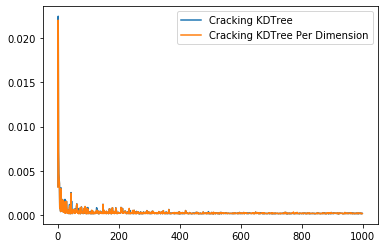

In [20]:
cols=2
# plot_time(pd.read_csv(f'results/results-MedianKDTree-{cols}.csv'), 'Median KDTree')
# plot_time(pd.read_csv(f'results/results-CrackingKDTree-{cols}.csv'), 'Cracking KDTree')
# plot_time(pd.read_csv(f'results/results-CrackingKDTreePerDimension-{cols}.csv'), 'Cracking KDTree Per Dimension')
# plot_time(pd.read_csv(f'results/results-Quasii-{cols}.csv'), 'Quasii')
# plt.plot(pd.read_csv(f'results/results-AverageKDTree-{cols}.csv')['scan_time'], label='Average KDTree')
# plt.plot(pd.read_csv(f'results/results-MedianKDTree-{cols}.csv')['scan_time'], label='Median KDTree')
plt.plot(pd.read_csv(f'results/results-CrackingKDTree-{cols}.csv')['scan_time'], label='Cracking KDTree')
plt.plot(pd.read_csv(f'results/results-CrackingKDTreePerDimension-{cols}.csv')['scan_time'], label='Cracking KDTree Per Dimension')
# plt.plot(pd.read_csv(f'results/results-Quasii-{cols}.csv')['scan_time'], label='Quasii')
# plt.plot(pd.read_csv(f'results/results-FullScan (BitVector)-{cols}.csv')['scan_time'], label='Full Scan')
# plt.plot(pd.read_csv(f'results/results-FullScan (Candidate List)-{cols}.csv')['scan_time'], label='Full Scan Candidate List')
    

plt.legend()